# Project 6

# AllLife Bank Customer Segmentation

**Description**

**Context**

AllLife Bank wants to focus on its credit card customer base in the next financial year. They have been advised by their marketing research team, that the penetration in the market can be improved. Based on this input, the Marketing team proposes to run personalized campaigns to target new customers as well as upsell to existing customers. Another insight from the market research was that the customers perceive the support services of the back poorly. Based on this, the Operations team wants to upgrade the service delivery model, to ensure that customer queries are resolved faster. Head of Marketing and Head of Delivery both decide to reach out to the Data Science team for help


**Objective**

To identify different segments in the existing customer, based on their spending patterns as well as past interaction with the bank, using clustering algorithms, and provide recommendations to the bank on how to better market to and service these customers.

**Data Description**

The data provided is of various customers of a bank and their financial attributes like credit limit, the total number of credit cards the customer has, and different channels through which customers have contacted the bank for any queries (including visiting the bank, online and through a call center).


**Data Dictionary**

*** Sl_No:** Primary key of the records

*** Customer Key:** Customer identification number

*** Average Credit Limit:** Average credit limit of each customer for all credit cards

*** Total credit cards:** Total number of credit cards possessed by the customer

*** Total visits bank:** Total number of visits that customer made (yearly) personally to the bank

*** Total visits online:** Total number of visits or online logins made by the customer (yearly)

*** Total calls made:** Total number of calls made by the customer to the bank or its customer service department (yearly)




In [ ]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# to scale the data using z-score
from sklearn.preprocessing import StandardScaler

# to compute distances
from scipy.spatial.distance import pdist

# to perform hierarchical clustering, compute cophenetic correlation, and create dendrograms
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet

# to perform PCA
from sklearn.decomposition import PCA

In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.decomposition import PCA

In [ ]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# To tune model, get different metric scores and split data
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    plot_confusion_matrix,
)


In [ ]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# to scale the data using z-score
from sklearn.preprocessing import StandardScaler

# to compute distances
from scipy.spatial.distance import cdist

# to perform k-means clustering and compute silhouette scores
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# to visualize the elbow curve and silhouette scores
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_excel('/content/drive/MyDrive/Machine Learning Course/Unsupervised Learning/Project/Credit+Card+Customer+Data.xlsx')

## Basic Data Analysis

In [ ]:
df1 = df.copy()

In [ ]:
df.head(10)

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3
5,6,58634,20000,3,0,1,8
6,7,48370,100000,5,0,11,2
7,8,37376,15000,3,0,1,1
8,9,82490,5000,2,0,2,2
9,10,44770,3000,4,0,1,7


In [ ]:
df.shape

(660, 7)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Sl_No                660 non-null    int64
 1   Customer Key         660 non-null    int64
 2   Avg_Credit_Limit     660 non-null    int64
 3   Total_Credit_Cards   660 non-null    int64
 4   Total_visits_bank    660 non-null    int64
 5   Total_visits_online  660 non-null    int64
 6   Total_calls_made     660 non-null    int64
dtypes: int64(7)
memory usage: 36.2 KB


In [ ]:
df.isnull().sum()

Sl_No                  0
Customer Key           0
Avg_Credit_Limit       0
Total_Credit_Cards     0
Total_visits_bank      0
Total_visits_online    0
Total_calls_made       0
dtype: int64

In [ ]:
columns = df.columns

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Sl_No,660.0,330.500000,190.669872,1.0,165.75,330.5,495.25,660.0
Customer Key,660.0,55141.443939,25627.772200,11265.0,33825.25,53874.5,77202.50,99843.0
Avg_Credit_Limit,660.0,34574.242424,37625.487804,3000.0,10000.00,18000.0,48000.00,200000.0
Total_Credit_Cards,660.0,4.706061,2.167835,1.0,3.00,5.0,6.00,10.0
Total_visits_bank,660.0,2.403030,1.631813,0.0,1.00,2.0,4.00,5.0
Total_visits_online,660.0,2.606061,2.935724,0.0,1.00,2.0,4.00,15.0
Total_calls_made,660.0,3.583333,2.865317,0.0,1.00,3.0,5.00,10.0


In [ ]:
df.duplicated().sum()

0

In [ ]:
df.shape

(660, 7)

In [ ]:
df.columns

Index(['Sl_No', 'Customer Key', 'Avg_Credit_Limit', 'Total_Credit_Cards',
       'Total_visits_bank', 'Total_visits_online', 'Total_calls_made'],
      dtype='object')

* From our basic data analysis, there are a total of 660 rows and 7 columns which includes:
  * **'Sl_No'**
  * **'Customer Key'**
  * **'Avg_Credit_Limit'**
  * **'Total_Credit_Cards'**
  * **'Total_visits_bank'**
  * **'Total_visits_online'**
  * **'Total_calls_made'**

* Of these columns, **'Sl_No'** is more like an index value and hence can be removed or set as index. This can be done in the data cleaning section.

* There are no missing values in any of the columns.

* All the columns are of numerical type. We will remove the **'Customer Key'** column when perfornming clustering algorithms.

## Data Cleaning

Let us convert the **'Sl_No'** to actual index values

In [ ]:
df = df.set_index('Sl_No')

In [ ]:
df.head(10)

,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
Sl_No,,,,,,
1,87073,100000,2,1,1,0
2,38414,50000,3,0,10,9
3,17341,50000,7,1,3,4
4,40496,30000,5,1,1,4
5,47437,100000,6,0,12,3
6,58634,20000,3,0,1,8
7,48370,100000,5,0,11,2
8,37376,15000,3,0,1,1
9,82490,5000,2,0,2,2


In [ ]:
columns = df.columns

In [ ]:
for column in columns:
  print("The number of unique values in:",column)
  print(df[column].nunique())
  print("-"*50)


The number of unique values in: Customer Key
655
--------------------------------------------------
The number of unique values in: Avg_Credit_Limit
110
--------------------------------------------------
The number of unique values in: Total_Credit_Cards
10
--------------------------------------------------
The number of unique values in: Total_visits_bank
6
--------------------------------------------------
The number of unique values in: Total_visits_online
16
--------------------------------------------------
The number of unique values in: Total_calls_made
11
--------------------------------------------------


When initially checked for duplicated values, there weren't any duplicate values but on the column **'Customer Key'** which is out unique identifier has only 655 unique values when compared to 660 total number of rows, which means there could 5 duplicate values in **'Customer Key'**. Let us examine this variable further.

In [ ]:
duplicated_indexes = df['Customer Key'].duplicated()

In [ ]:
duplicated_values = []
for i in range(0,len(df)):
  if duplicated_indexes.iloc[i] == True:
    duplicated_values.append(df.iloc[i])

In [ ]:
duplicated_values = pd.DataFrame(duplicated_values)

In [ ]:
duplicated_values

,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
333,47437,17000,7,3,1,0
399,96929,67000,6,2,2,2
433,37252,59000,6,2,1,2
542,50706,60000,7,5,2,2
633,97935,187000,7,1,7,0


In [ ]:
cust_key = duplicated_values['Customer Key']

In [ ]:
df['Customer Key'].iloc[1]

38414

In [ ]:
all_duplicated_values = []
for i in cust_key:
  for j in range(0,len(df)):
    if df['Customer Key'].iloc[j] == i:
      all_duplicated_values.append(df.iloc[j])

all_duplicated_values = pd.DataFrame(all_duplicated_values)

In [ ]:
all_duplicated_values

,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
5,47437,100000,6,0,12,3
333,47437,17000,7,3,1,0
392,96929,13000,4,5,0,0
399,96929,67000,6,2,2,2
49,37252,6000,4,0,2,8
433,37252,59000,6,2,1,2
412,50706,44000,4,5,0,2
542,50706,60000,7,5,2,2
105,97935,17000,2,1,2,10
633,97935,187000,7,1,7,0


Analyzing the data for possible duplicate values - although the **'Customer Key'** looks the same for these rows, the values in other columns are still different. So this cannot be exactly duplicate values but a possbile mistake while entering **'Customer Key'**.

We will see the implications of these rows after we run clustering and further analyze the results.

## Exploratory Data Analysis, Outliers Treatment

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 660 entries, 1 to 660
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Customer Key         660 non-null    int64
 1   Avg_Credit_Limit     660 non-null    int64
 2   Total_Credit_Cards   660 non-null    int64
 3   Total_visits_bank    660 non-null    int64
 4   Total_visits_online  660 non-null    int64
 5   Total_calls_made     660 non-null    int64
dtypes: int64(6)
memory usage: 36.1 KB


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Customer Key,660.0,55141.443939,25627.772200,11265.0,33825.25,53874.5,77202.5,99843.0
Avg_Credit_Limit,660.0,34574.242424,37625.487804,3000.0,10000.00,18000.0,48000.0,200000.0
Total_Credit_Cards,660.0,4.706061,2.167835,1.0,3.00,5.0,6.0,10.0
Total_visits_bank,660.0,2.403030,1.631813,0.0,1.00,2.0,4.0,5.0
Total_visits_online,660.0,2.606061,2.935724,0.0,1.00,2.0,4.0,15.0
Total_calls_made,660.0,3.583333,2.865317,0.0,1.00,3.0,5.0,10.0


Looking at the statistical summary from above for all the columns - the mean and 75th percentile value are far below the maximum value. So there could be possible outliers.

* **Avg_Credit_Limit** - mean = 34574.24 and 75th percentile value is 48000 but the maximum value is 200000.
* **Total_Credit_Cards** - mean = 4.70 and 75th percentile value is 6 but the maximym value is 10
* **Total_visits_online** - mean = 2.60 and 75th percentile value is 4 but the maximum value is 15
* **Total_calls_made** - mean = 3.58 and 75th percentile value is 5 but the maximum value is 10



In [ ]:
columns = columns.drop('Customer Key')

In [ ]:
columns

Index(['Avg_Credit_Limit', 'Total_Credit_Cards', 'Total_visits_bank',
       'Total_visits_online', 'Total_calls_made'],
      dtype='object')

In [ ]:
for column in columns:
  print("The value count for the column:",column)
  print(df[column].value_counts())
  print("*"*50)

The value count for the column: Avg_Credit_Limit
8000      35
6000      31
9000      28
13000     28
19000     26
10000     26
11000     24
7000      24
14000     23
18000     23
17000     23
16000     22
5000      21
20000     20
12000     18
15000     17
36000     11
70000     10
50000      8
38000      8
68000      7
39000      7
56000      7
41000      6
47000      6
52000      6
48000      6
74000      6
37000      6
30000      6
34000      6
65000      5
26000      5
29000      5
31000      5
60000      5
69000      4
51000      4
66000      4
33000      4
49000      4
71000      4
73000      4
59000      4
64000      4
54000      4
28000      3
57000      3
62000      3
100000     3
45000      3
58000      3
46000      3
44000      3
40000      3
72000      3
61000      3
67000      3
27000      2
32000      2
156000     2
84000      2
163000     2
172000     2
195000     2
42000      2
166000     2
75000      2
63000      2
35000      2
153000     1
184000     1
123000     1
17

In [ ]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [ ]:
def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=45, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [ ]:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))

### Univariate Analysis

### 'Avg_Credit_Limit'

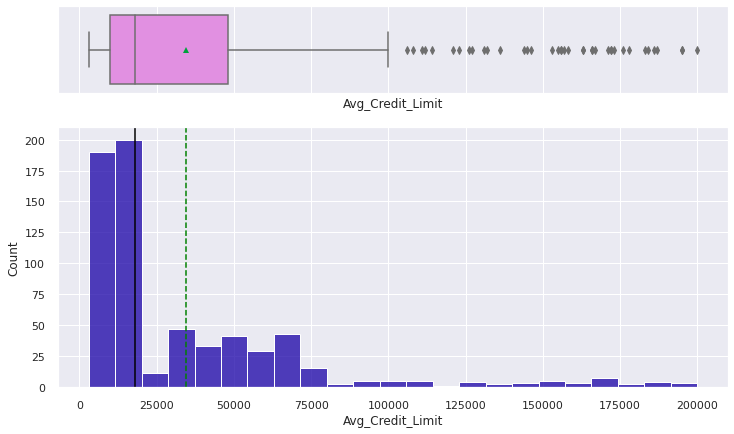

In [ ]:
histogram_boxplot(df,columns[0])

In [ ]:
df["Avg_Credit_Limit"].describe()

count       660.000000
mean      34574.242424
std       37625.487804
min        3000.000000
25%       10000.000000
50%       18000.000000
75%       48000.000000
max      200000.000000
Name: Avg_Credit_Limit, dtype: float64

In [ ]:
Q1 = df["Avg_Credit_Limit"].quantile(0.25)  # 25th quantile
Q3 = df["Avg_Credit_Limit"].quantile(0.75)  # 75th quantile
IQR = Q3 - Q1
Lower_Whisker_income = Q1 - 1.5 * IQR
Upper_Whisker_income = Q3 + 1.5 * IQR
df_higer_credit_limit = df[df['Avg_Credit_Limit']>= Upper_Whisker_income]

In [ ]:
Upper_Whisker_income


105000.0

In [ ]:
df.shape

(660, 6)

In [ ]:
df_higer_credit_limit

,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
Sl_No,,,,,,
613,94391,157000,9,1,14,1
615,40019,163000,8,1,7,1
616,77910,131000,9,1,10,1
618,98216,136000,8,0,13,0
619,54495,121000,7,0,13,2
620,47650,158000,7,0,13,0
621,32107,108000,10,0,15,1
622,84192,166000,9,1,12,2
623,53916,176000,10,1,15,2


In [ ]:
df_higer_credit_limit.shape

(39, 6)

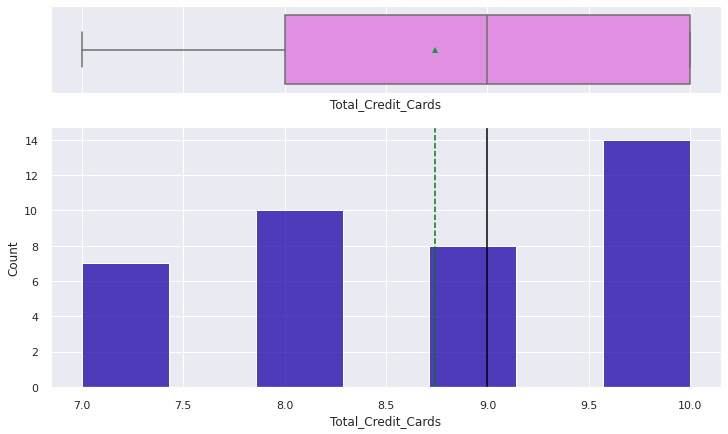

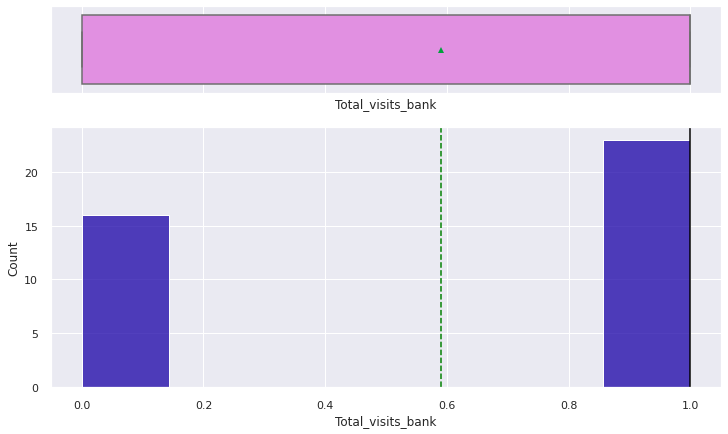

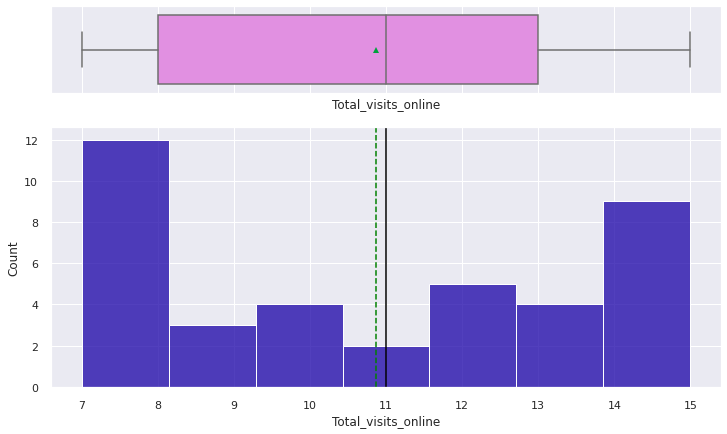

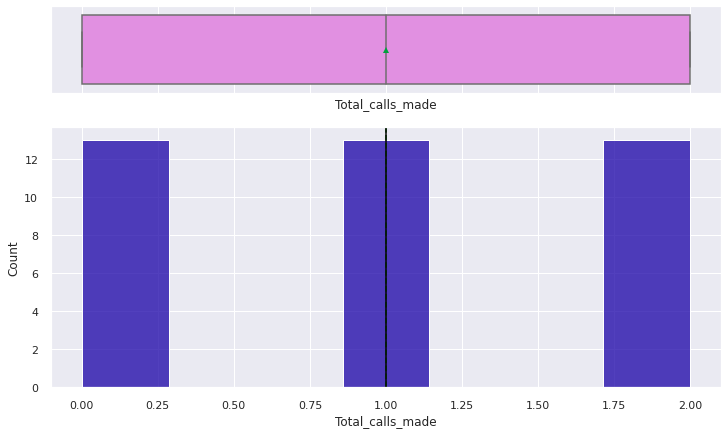

In [ ]:
histogram_boxplot(df_higer_credit_limit,columns[1])
histogram_boxplot(df_higer_credit_limit,columns[2])
histogram_boxplot(df_higer_credit_limit,columns[3])
histogram_boxplot(df_higer_credit_limit,columns[4])


Taking a look at the **’Avg_Credit_Limit’** variable:
* The variable is completely one-sided, not normally distrubuted with mean 34574.24

* There are a lot of outliers beyond the upper whisker

* The 75th percentile value for this variable is 105000 and there are 39 entries out of 660 that are above the 75th percentile value.

* Taking a look at those 39 values:
  * The Total_Credit_Cards is on the higher side making **’Avg_Credit_Limit’** go higher
  * Interestingly, the **Total_Visits_bank** is only 0 or 1
  * **'Total_visits_online'** is on the higher side
  * **’Total_calls_made’** is also on the low side – 0,1 or 2.

From the higher number of credit cards, the average credit limit being high can be justified. Hence, these values might not be treated for outliers. But, we can see the clustering results without these values too while performing clustering. Also, interestingly we can say that the customers with high average credit limit tend to have high online visits rather than visiting the bank in-person.


### 'Total_Credit_Cards'

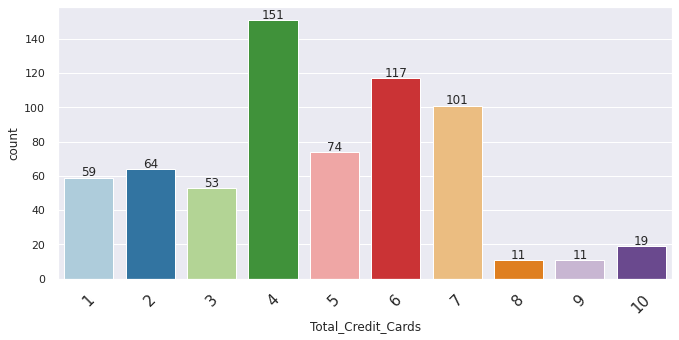

In [ ]:
labeled_barplot(df, "Total_Credit_Cards", perc=False)

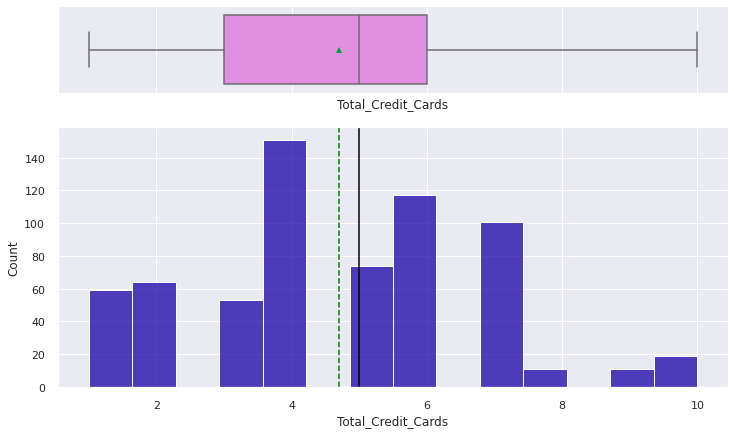

In [ ]:
histogram_boxplot(df,'Total_Credit_Cards')

* The values are spread out and there are no outliers.
* Most people have 4 credit cards followed by 6 and 7.

### 'Total_visits_bank'

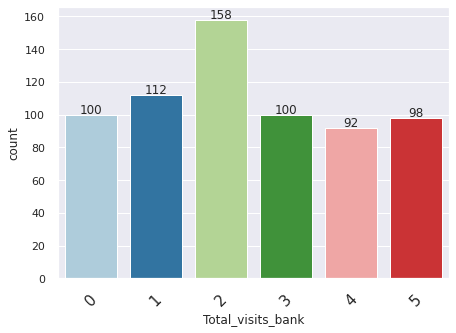

In [ ]:
labeled_barplot(df, "Total_visits_bank", perc=False)

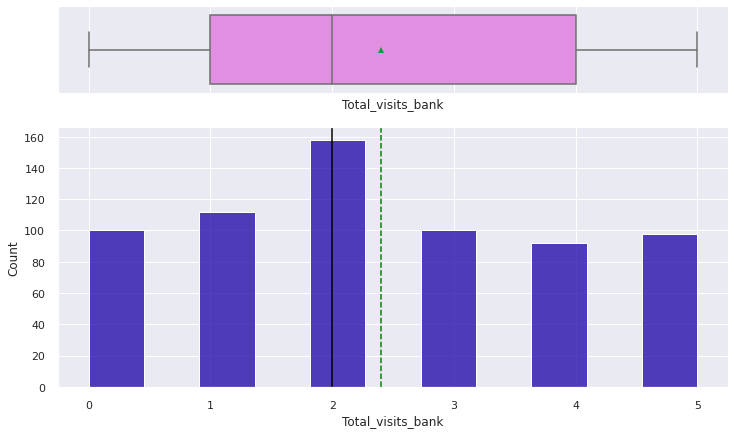

In [ ]:
histogram_boxplot(df,'Total_visits_bank')

* The number of people who visited bank 2 times is higher compared to others.
* The variable can be said as normally distributed with mean around 2
* There are no outliers

### 'Total_visits_online'

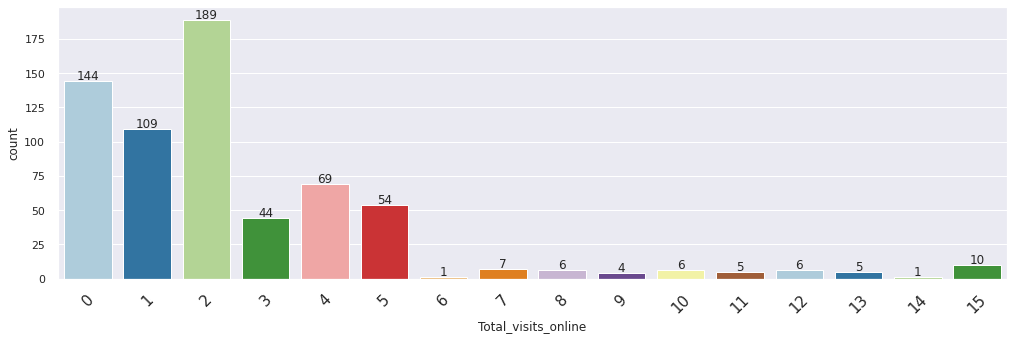

In [ ]:
labeled_barplot(df, "Total_visits_online", perc=False)

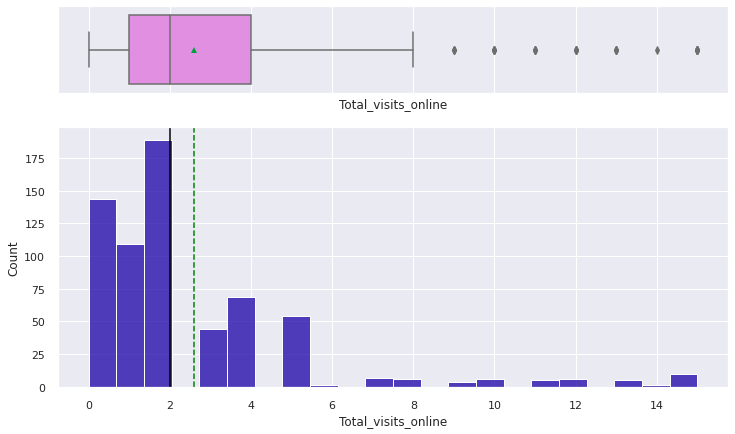

In [ ]:
histogram_boxplot(df,'Total_visits_online')

In [ ]:
df['Total_visits_online'].describe()

count    660.000000
mean       2.606061
std        2.935724
min        0.000000
25%        1.000000
50%        2.000000
75%        4.000000
max       15.000000
Name: Total_visits_online, dtype: float64

In [ ]:
Q1_1 = df["Total_visits_online"].quantile(0.25)  # 25th quantile
Q3_1 = df["Total_visits_online"].quantile(0.75)  # 75th quantile
IQR_1 = Q3_1 - Q1_1
Lower_Whisker_income_1 = Q1_1 - 1.5 * IQR_1
Upper_Whisker_income_1 = Q3_1 + 1.5 * IQR_1
df_higer_visits_online = df[df['Total_visits_online']>= Upper_Whisker_income_1]

In [ ]:
df_higer_visits_online.shape

(37, 6)

In [ ]:
df_higer_visits_online

,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
Sl_No,,,,,,
2,38414,50000,3,0,10,9
5,47437,100000,6,0,12,3
7,48370,100000,5,0,11,2
613,94391,157000,9,1,14,1
614,50598,94000,9,1,11,0
616,77910,131000,9,1,10,1
617,89832,96000,10,1,11,2
618,98216,136000,8,0,13,0
619,54495,121000,7,0,13,2


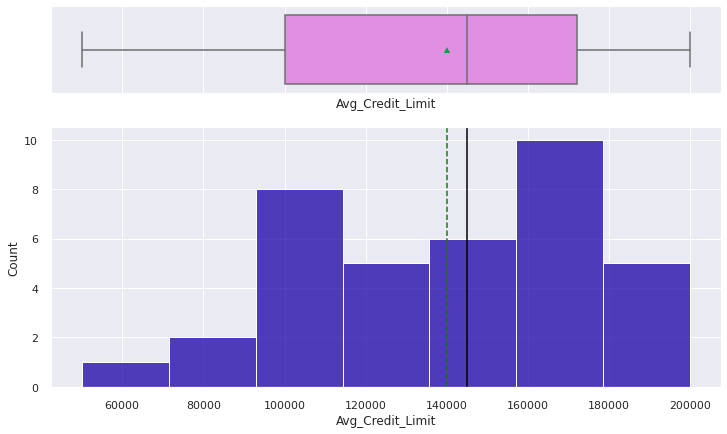

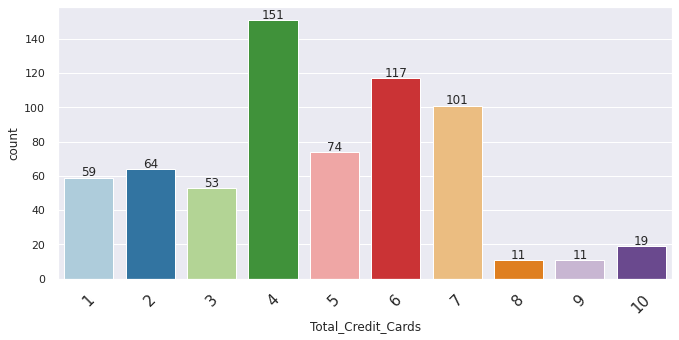

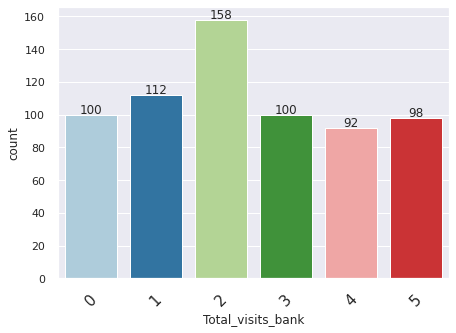

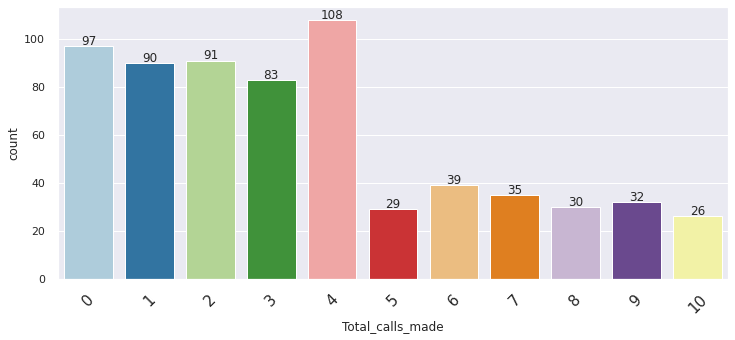

In [ ]:
histogram_boxplot(df_higer_visits_online,columns[0])
labeled_barplot(df, "Total_Credit_Cards", perc=False)
labeled_barplot(df, "Total_visits_bank", perc=False)
labeled_barplot(df, "Total_calls_made", perc=False)


Taking a look at the variable **’Total_visits_online’**:

* The variable is skewed and has most values as 2 followed by 0 and 1.

* The variable as suspected has outliers and the 75th percentile value is 4. There are 37 outliers.

* Looking at those 37 values:
  * The average credit limit for these values are on the higher side with mean around 140000
  * These customers have higher number of credit cards too – obvious from the high average credit limit
  * The Total_calls_made is mostly on the lower side.

Let us see if there are any common values between these values and the outliers for the variable from **’Avg_Credit_Limit’** and then decide if these need to be treated.


In [ ]:
df_higer_visits_online['Customer Key'].isin(df_higer_credit_limit['Customer Key']).value_counts()

True     27
False    10
Name: Customer Key, dtype: int64

Out of the 37 outliers, 27 outliers are already part of the outliers from the variable 'Avg_Credit_Limit'. Let us create a dataframe Outliers and see the impact of clustering with the outliers and without the outliers.

In [ ]:
outliers = df_higer_credit_limit.copy()

In [ ]:
df_higer_visits_online[df_higer_visits_online['Customer Key'].isin(df_higer_credit_limit['Customer Key']) == False]

,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
Sl_No,,,,,,
2,38414,50000,3,0,10,9
5,47437,100000,6,0,12,3
7,48370,100000,5,0,11,2
614,50598,94000,9,1,11,0
617,89832,96000,10,1,11,2
629,75009,84000,9,1,15,0
643,91575,97000,10,1,9,2
654,51826,95000,10,0,15,1
656,51108,99000,10,1,10,0


In [ ]:
outliers = outliers.append(df_higer_visits_online[df_higer_visits_online['Customer Key'].isin(df_higer_credit_limit['Customer Key']) == False])

In [ ]:
outliers['Customer Key'].duplicated().sum()

0

### 'Total_calls_made'

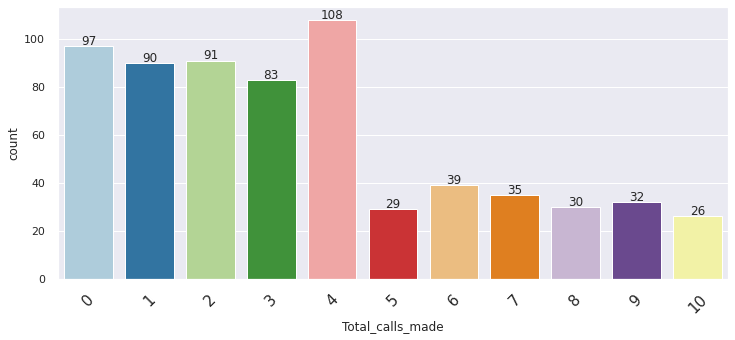

In [ ]:
labeled_barplot(df,"Total_calls_made", perc = False)

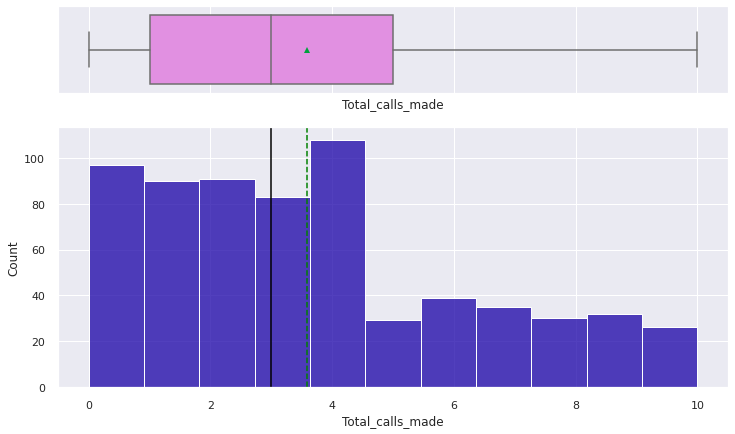

In [ ]:
histogram_boxplot(df, 'Total_calls_made')

* The variable does not have a normal distribution.
* Most customers have made 4 calls.
* There are no outliers.

**Summary of Univariate Analysis:**

**Avg_Credit_Limit:**

Taking a look at the **’Avg_Credit_Limit’** variable:
* The variable is completely one-sided, not normally distrubuted with mean 34574.24

* There are a lot of outliers beyond the upper whisker

* The 75th percentile value for this variable is 105000 and there are 39 entries out of 660 that are above the 75th percentile value.

* Taking a look at those 39 values:
  * The Total_Credit_Cards is on the higher side making **’Avg_Credit_Limit’** go higher
  * Interestingly, the **Total_Visits_bank** is only 0 or 1
  * **'Total_visits_online'** is on the higher side
  * **’Total_calls_made’** is also on the low side – 0,1 or 2.

From the higher number of credit cards, the average credit limit being high can be justified. Hence, these values might not be treated for outliers. But, we can see the clustering results without these values too while performing clustering. Also, interestingly we can say that the customers with high average credit limit tend to have high online visits rather than visiting the bank in-person.

**Total_Credit_Cards:**
* The values are spread out and there are no outliers.
* Most people have 4 credit cards followed by 6 and 7.

**Total_visits_bank:**
* The number of people who visited bank 2 times is higher compared to others.
* The variable can be said as normally distributed with mean around 2
* There are no outliers

**Total_visits_online:**
Taking a look at the variable **’Total_visits_online’**:

* The variable is skewed and has most values as 2 followed by 0 and 1.

* The variable as suspected has outliers and the 75th percentile value is 4. There are 37 outliers.

* Looking at those 37 values:
  * The average credit limit for these values are on the higher side with mean around 140000
  * These customers have higher number of credit cards too – obvious from the high average credit limit
  * The Total_calls_made is mostly on the lower side.

Let us see if there are any common values between these values and the outliers for the variable from **’Avg_Credit_Limit’** and then decide if these need to be treated.

**Total_calls_made:**
* The variable does not have a normal distribution.
* Most customers have made 4 calls.
* There are no outliers.

### Bi-variate Analysis:

In [ ]:
# Function to plot numerical feature by each category with target hue

def plot_numeric_by_cat(data: pd.DataFrame, category_columns: list, numeric_column: str, hue: str = None):
    '''
    The function plots a numerical feature in box plot by every category column specified in the list,
    with hue of a target category
    '''
    num_cols = 2
    num_rows = int(len(category_columns) /2 + 1)

    plt.figure(figsize=(20, 8*num_rows))
    for i, col in enumerate(category_columns):
        plt.subplot(num_rows, num_cols, i+1)
        sns.set(palette="nipy_spectral");
        sns.boxplot(data=data, x=col, y=numeric_column, hue=hue, showfliers=True).set(title = numeric_column + ' vs. ' + col );

In [ ]:
def plot_corr(df, size=10):
    corr = df.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns,rotation = 45)
    plt.yticks(range(len(corr.columns)), corr.columns)
    for (i, j), z in np.ndenumerate(corr):
        ax.text(j, i, '{:0.1f}'.format(z), ha='center', va='center')

In [ ]:
df_wo_custkey = df.drop('Customer Key', axis = 1)

In [ ]:
df_wo_custkey.sample(10)

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
Sl_No,,,,,
45,11000,4,2,4,5
148,5000,2,2,5,6
283,6000,6,3,1,1
613,157000,9,1,14,1
543,47000,5,5,1,2
188,16000,2,2,3,8
126,14000,2,1,5,5
231,17000,4,5,0,2
214,8000,1,0,2,10


Lets plot the variable - "**Avg_Credit_Limit**" against all other variables.

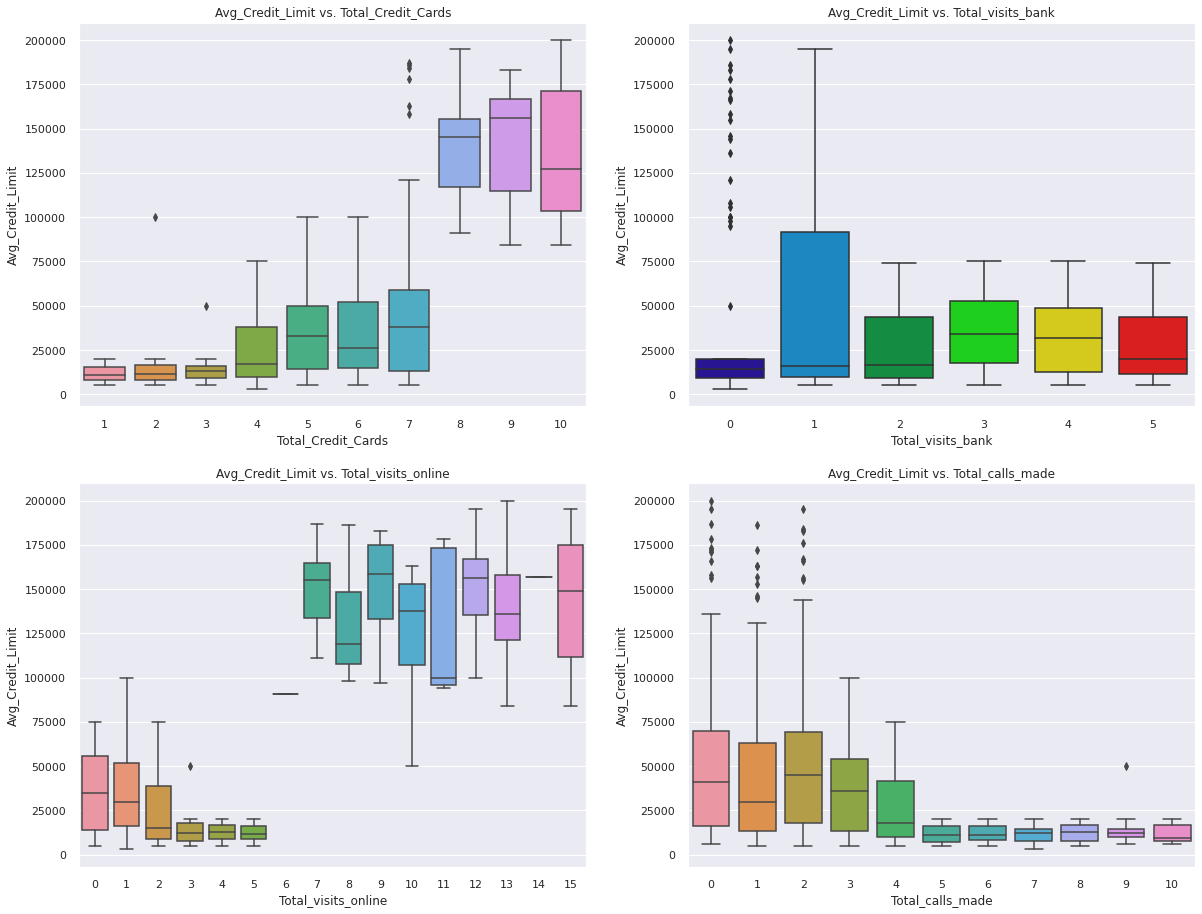

In [ ]:
plot_numeric_by_cat(df,category_columns=['Total_Credit_Cards', 'Total_visits_bank', 'Total_visits_online', 'Total_calls_made'],numeric_column='Avg_Credit_Limit')

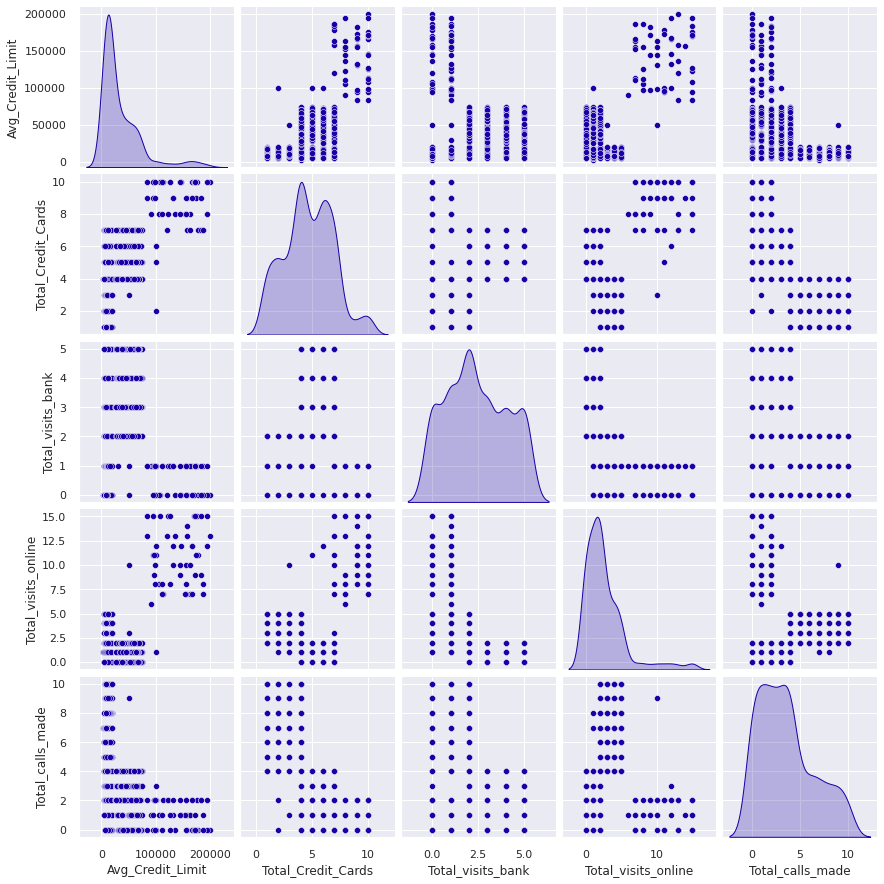

In [ ]:
sns.pairplot(df_wo_custkey,diag_kind='kde');

**Bi-variate Analysis summary**

* From Avg_Credit_Limit vs Total_Credit_Cards plot, we could clearly see there
could be 3 clusters.

* This is also evident from the Avg_Credit_Limit vs Total_visits_online plot, which also clearly has 3 groups.

From the pair plot:

* Looking at the diagonal plots - distribution peaks for each variable can also be used to guess the number of clusters.
* For example, from the variable 'Total_Credit_Cards' there can be 4 clustrers based on 4 peaks.
* Also, from the correlation between variables we can clearly distinguish atleast 2 groups of data well separated in most of the correlation plots above.

**Data Pre-processing**

Generally for clustering, we remove the unique identifier before running with algorithm. The dataframe - df_wo_custkey already has the 'Customer Key' variable removed. Let us rename and use this dataframe for running the algorithm


In [ ]:
data = df_wo_custkey.copy()

In [ ]:
data1 = data.copy()

Since each variable are of different measures, while calculating distance be it any distance we will be biased. So, let us normalize the data before running into algorithm.

In [ ]:
sc = StandardScaler()

In [ ]:
data_scaled = pd.DataFrame(sc.fit_transform(data), columns = data.columns)

In [ ]:
data_scaled.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1.740187,-1.249225,-0.860451,-0.547490,-1.251537
1,0.410293,-0.787585,-1.473731,2.520519,1.891859
2,0.410293,1.058973,-0.860451,0.134290,0.145528
3,-0.121665,0.135694,-0.860451,-0.547490,0.145528
4,1.740187,0.597334,-1.473731,3.202298,-0.203739


## K-Means clustering

Finding Within cluster variance for each cluster:

Number of Clusters: 1 	Average Distortion: 2.006922226250361
Number of Clusters: 2 	Average Distortion: 1.4571553548514269
Number of Clusters: 3 	Average Distortion: 1.1466276549150365
Number of Clusters: 4 	Average Distortion: 1.0463825294774465
Number of Clusters: 5 	Average Distortion: 0.9907723334708022
Number of Clusters: 6 	Average Distortion: 0.9431029376988642
Number of Clusters: 7 	Average Distortion: 0.9103913802247622
Number of Clusters: 8 	Average Distortion: 0.8892759391832861
Number of Clusters: 9 	Average Distortion: 0.8684124712901314
Number of Clusters: 10 	Average Distortion: 0.8482099820262211
Number of Clusters: 11 	Average Distortion: 0.8224350031342466
Number of Clusters: 12 	Average Distortion: 0.8073089391237722
Number of Clusters: 13 	Average Distortion: 0.7809048806512544
Number of Clusters: 14 	Average Distortion: 0.7708175891998205


Text(0.5, 1.0, 'Selecting k with the Elbow Method')

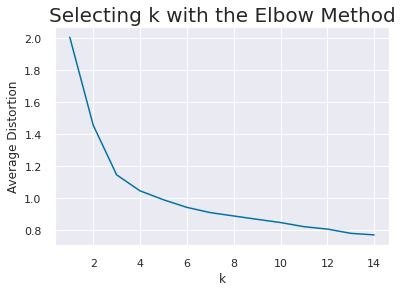

In [ ]:
clusters = range(1, 15)
meanDistortions = []  # Create a empty list

for k in clusters:
    model = KMeans(n_clusters=k)  # Initialize KMeans
    model.fit(data_scaled)  # Fit kMeans on the data
    prediction = model.predict(data_scaled)  # Predict the model on the data
    distortion = (
        sum(np.min(cdist(data_scaled, model.cluster_centers_, "euclidean"), axis=1))
        / data_scaled.shape[0]  # Find distortion
    )

    meanDistortions.append(
        distortion
    )  # Append distortion values to the empty list created above

    print("Number of Clusters:", k, "\tAverage Distortion:", distortion)

plt.plot(clusters, meanDistortions, "bx-")
plt.xlabel("k")  # Title of X-axis
plt.ylabel("Average Distortion")  # Title of y-axis
plt.title("Selecting k with the Elbow Method", fontsize=20)  # Title of the plot

* So, we have run the K-Means algorithm for when the number of clusters = 1 to 14 and plotted the corresponding within cluster variance along Y-axis.
* As the number of cluster go higher and higher, the within cluster variance also go down as there will be now less number of points that are close to each other and hence less within cluster variation - the average distortion.
* From the **Elbow Plot**,at when no of clusters = 3, there is a clear steep drop and after that it is all gradual drop. The idea of having 3 clusters also match with the number of clusters from the bi-variate analysis.

Let us now analyze the Silhouette Coefficient for these clusters

For n_clusters = 2, silhouette score is 0.41842496663215445
For n_clusters = 3, silhouette score is 0.5157182558881063
For n_clusters = 4, silhouette score is 0.3556670619372605
For n_clusters = 5, silhouette score is 0.2723911235693706
For n_clusters = 6, silhouette score is 0.25583657571102003
For n_clusters = 7, silhouette score is 0.24817058559087743
For n_clusters = 8, silhouette score is 0.22626152588596737
For n_clusters = 9, silhouette score is 0.21806734113251328
For n_clusters = 10, silhouette score is 0.2091047031724639
For n_clusters = 11, silhouette score is 0.2018923620785751
For n_clusters = 12, silhouette score is 0.21483208034454615
For n_clusters = 13, silhouette score is 0.2106315786523813
For n_clusters = 14, silhouette score is 0.21456839030422792


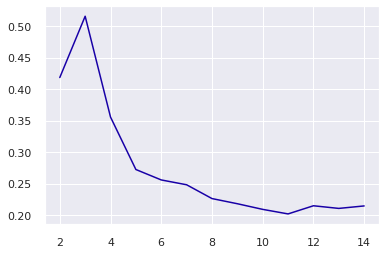

In [ ]:
sil_score = []  # Create empty list
cluster_list = list(range(2, 15))  # Creating a list of range from 2 to 10
for n_clusters in cluster_list:
    clusterer = KMeans(n_clusters=n_clusters)  # Initializing KMeans algorithm
    preds = clusterer.fit_predict((data_scaled))  # Predicting on the data
    # centers = clusterer.cluster_centers_
    score = silhouette_score(data_scaled, preds)  # Cacalculating silhouette score
    sil_score.append(score)  # Appending silhouette score to empty list created above
    print("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

plt.plot(cluster_list, sil_score)

In [ ]:
max(sil_score)

0.5157182558881063

* Silhouette Coefficient is a measure of how good or bad the clustering is by measuring how similar a point is to its own cluster and compares it with other clusters too and then scores it from a -1 to 1 scale.
* We need Silhouette coefficient to be higher on the positive side.
* From the above plot, the maximum Silhouette coefficient is 0.5157182558881063 for when the number of clusters is 3

Let us compare it with the average distortion value side by side and decide the optimum clusters.

In [ ]:
no_of_clusters = list(range(2,15))

In [ ]:
AvgDistortions = meanDistortions.copy()

In [ ]:
del AvgDistortions[0]

In [ ]:
print(no_of_clusters)
print(AvgDistortions)
print(sil_score)

[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]
[1.4571553548514269, 1.1466276549150365, 1.0463825294774465, 0.9907723334708022, 0.9431029376988642, 0.9103913802247622, 0.8892759391832861, 0.8684124712901314, 0.8482099820262211, 0.8224350031342466, 0.8073089391237722, 0.7809048806512544, 0.7708175891998205]
[0.41842496663215445, 0.5157182558881063, 0.3556670619372605, 0.2723911235693706, 0.25583657571102003, 0.24817058559087743, 0.22626152588596737, 0.21806734113251328, 0.2091047031724639, 0.2018923620785751, 0.21483208034454615, 0.2106315786523813, 0.21456839030422792]


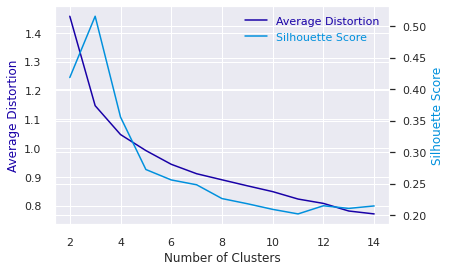

In [ ]:
from mpl_toolkits.axes_grid1 import host_subplot
import matplotlib.pyplot as plt

host = host_subplot(111)

par = host.twinx()

host.set_xlabel("Number of Clusters")
host.set_ylabel("Average Distortion")
par.set_ylabel("Silhouette Score")

p1, = host.plot(no_of_clusters, AvgDistortions, label="Average Distortion")
p2, = par.plot(no_of_clusters, sil_score, label="Silhouette Score")

leg = plt.legend()

host.yaxis.get_label().set_color(p1.get_color())
leg.texts[0].set_color(p1.get_color())

par.yaxis.get_label().set_color(p2.get_color())
leg.texts[1].set_color(p2.get_color())

plt.show()

* From the above plot, for the average distortion we need to see a sharp bend and for the Silhouette coefficen, the value has to be maximum on the positive side.
* When cluster = 3, the score is also maximum and there is a sharp elbow too. Hence, let us choose 3 as our optimum clusters and use Silhouette Visualiser to visualise the clustering for other cluster numbers too.
* It is also to be noted that the Silhouette score and the average distortion have been calculated for the entire dataframe including the outliers. The outliers effect can be seen using the Silhouette visualizer below. If an outlier is impacting the cluster formation, the outliers itself will form a seprate cluster which will create a slim looking cluster on the Silhouette visualizer. Hence, we can use the Silhouette visualizer to conclude if the outliers are to be removed.

**Silhouette Visualizer**

When K=3

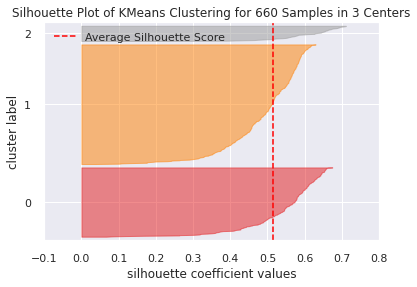

In [ ]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(3, random_state=1))
visualizer.fit(data_scaled)
visualizer.show()

The width of the each colored cluster above is proportional to the number of datapoints in that cluster. Having said that, with 3 clusters - the width of cluster with label = 2 is less but not worst.


Let us plot with K=4

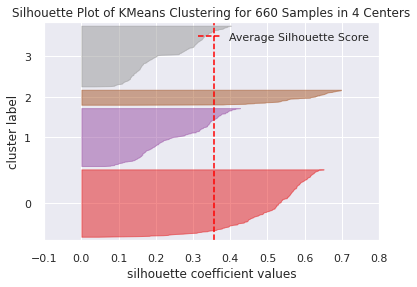

In [ ]:
visualizer = SilhouetteVisualizer(KMeans(4, random_state=1))
visualizer.fit(data_scaled)
visualizer.show()

Let us plot with K = 5

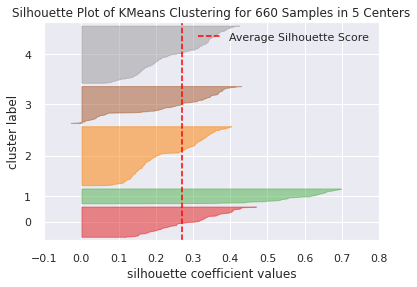

In [ ]:
visualizer = SilhouetteVisualizer(KMeans(5, random_state=1))
visualizer.fit(data_scaled)
visualizer.show()

Let us plot with K = 6

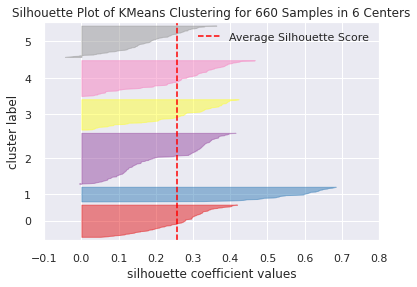

In [ ]:
visualizer = SilhouetteVisualizer(KMeans(6, random_state=1))
visualizer.fit(data_scaled)
visualizer.show()

* Even with more clusters, the Silhouette visualizer does not differentiate the outliers. This is a good indication that the outlier points are not biasing the clustering. Hence, we can decide to have those outliers in the dataset.
* **Optimal K**: As far as the optimal K is concerned, we want to take into account the average distortion, Silhouette coefficient and the business interpreation of the cluster with the optimal K. For now - considering average distortion and the Silhouette coefficient along with Silhouette visualizer, **K=3** is a good optimal number of clusters. Let us visualize this and see if a business interpretation could be made.

**Applying K = 3**

In [ ]:
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(data_scaled)

KMeans(n_clusters=3, random_state=0)

let us add the data lables to the original dataset that does not have the "Customer Key"

In [ ]:
# adding kmeans cluster labels to the original dataframe
data["K_means_segments"] = kmeans.labels_
df["K_means_segments"] = kmeans.labels_

**Cluster Profiling**

In [ ]:
cluster_profile = data.groupby("K_means_segments").mean()

In [ ]:
cluster_profile["count_in_each_segment"] = (
    data.groupby("K_means_segments")["Avg_Credit_Limit"].count().values
)

In [ ]:
# let's display cluster profiles
cluster_profile.style.highlight_max(color="lightgreen", axis=0)

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,count_in_each_segment
K_means_segments,,,,,,
0,33782.383420,5.515544,3.489637,0.981865,2.000000,386
1,12174.107143,2.410714,0.933036,3.553571,6.870536,224
2,141040.000000,8.740000,0.600000,10.900000,1.080000,50


From the Cluster Profiling data,

1) **Cluster 0**: Has 386 datapoints - the most and the average of "Total_visits_bank"is high meaning most people in this cluster prefer visiting the bank.

2) **Cluster 1**: Has 224 points and the average of "Total_calls_made** is high in this group meaning most people in this cluster prefer calling instead of going to the bank.

3) **Cluster 2**: Has only 50 datapoits with high average "Avg_Credit_Limit", high "Total_Credit_Cards" and the average of "Total_visits_online" is also high. So this group can be interpreted as the cluster with rich/wealthy customers with internet access anytime. These customers prefer visiting online site instead of visiting the bank in-person or calling the bank.

Therefore,

* **Cluster 0** can be said as the cluster with **Customers who prefer visiting in-person**
* **Cluster 1** can be said as the cluster with **Customers who prefer making calls**
* **Cluster 2** can be said as the cluster with **Customers who prefer visiting online**


**Since 3 clusters also make a good business sense, we can further conclude the best number of clusters for this dataset based on K-modes clustering is 3.**

Let us visualise the 3 clusters

In [ ]:
num_col = ["Avg_Credit_Limit","Total_Credit_Cards","Total_visits_bank","Total_visits_online","Total_calls_made","count_in_each_segment"]

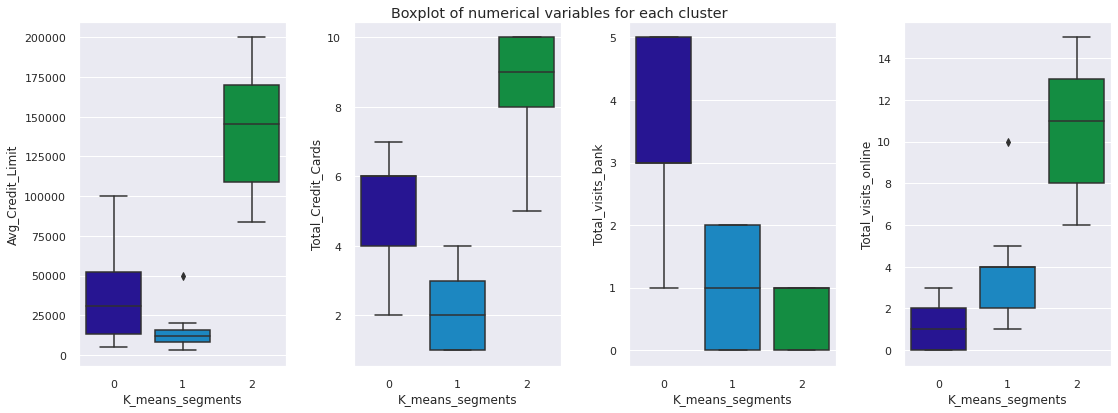

In [ ]:
fig, axes = plt.subplots(1, 4, figsize=(16, 6))
fig.suptitle("Boxplot of numerical variables for each cluster")
counter = 0
for ii in range(4):
    sns.boxplot(ax=axes[ii], y=data[num_col[counter]], x=data["K_means_segments"])
    counter = counter + 1

fig.tight_layout(pad=2.0)

From the above graph, the "Total_visits_bank" variable could not be properly used for clustering because we could see that customers with 0 and 1 as values for this variable are in both clusters 1 and 2.


### Business Insights based on K-modes Clustering:

**Cluster 0:**

Customers whose “Total_Credit_Cards” fall around 3 to 7 and has the “Avg_Credit_Limit” ranging around 20000 to 100000 prefer to visit the bank in-person. Improve the in-person services for these customers.

**Cluster 1:**

Customers whose “Total_Credit_Cards” fall around 1 to 3 and has the “Avg_Credit_Limit” ranging from 0 to 20000 prefer to make calls. Improve the call services for these customers and since these customers prefer calling any advertisements on the phone calls can be focused primarily for this group of customers whose credit limit is upto 20000 and has the credit cards upto 3.

**Cluster 2:**

The customer with more than 7 credit cards and having more than 100000 as credit limit fall into this category and these customers prefer vising the website. Hence, online ads can be tailored to fit this particular group of customers.


## Hierarchical Clustering:

Since we have already scaled the data and stored as data_scaled dataframe, we can use the same dataframe for Hierarchical clustering analysis.

In [ ]:
data_scaled.sample(10)

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
70,-0.547231,-1.710864,-0.247170,0.47518,1.193326
235,-0.573829,1.058973,0.979390,-0.88838,-1.251537
513,0.144314,0.135694,0.366110,-0.54749,0.145528
414,0.809261,-0.325946,0.366110,-0.88838,-0.203739
161,-0.706819,-0.787585,-0.247170,0.81607,0.494794
455,0.330499,0.597334,-0.247170,-0.88838,0.145528
370,-0.627025,0.135694,0.366110,-0.20660,-0.203739
581,-0.228057,0.597334,1.592670,-0.54749,0.145528
100,-0.627025,-1.710864,-1.473731,0.81607,0.844060
496,0.383695,0.135694,0.366110,-0.20660,-0.203739


* One major difference between Unsupervised and Supervised learning is the lack of the target variable. In Supervised learning we had target variable and hence a metric that we want to be improved so as to have better prediction for our target variable.
* But in case of Unsupervised learning, there is no target variable and hence no metric to evaluate the clustering model.
* To further make things worse in Hierarchical clustering, since Hierarchical clustering make a dendogram there is no clear metric to evaluate the accuracy of the clusters. The only relevant metric we can use is the **"Cophenetic Correlation"**.
* However we cannot use "Cophenetic Correlation" as a major deciding criteria while confirming the optimal number of clusters like we used "Silhouette Coefficient" for K-means clustering. The reason is because "Cophenetic correlation" only tries to draw correaltion between actual distance say Euclidean and the dendogram distance but does not tell us if a datapoint is sitting in a correct cluster or in other words "Cophenetic correaltion" cannot be primarily used for deciding the accuracy of the clusters in Hierarchical clustering.

Having said that, let us find Cophenetic correlation between different measures and linkage methods.

The distance metrics we will consider in this project are:
* Euclidean
* Chebyshev
* Mahalanobis
* Cityblock
* Jaccard
* Minkowski

The linkage methods we will consider are:
* Single
* Complete
* Average
* Weighted
* Ward for Euclidean only
* Centriod for Euclidean only


In [ ]:
# list of distance metrics
distance_metrics = ["euclidean", "chebyshev", "mahalanobis", "cityblock", "jaccard", "minkowski"]

# list of linkage methods
linkage_methods = ["single", "complete", "average", "weighted"]

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for dm in distance_metrics:
    for lm in linkage_methods:
        Z = linkage(data_scaled, metric=dm, method=lm)
        c, coph_dists = cophenet(Z, pdist(data_scaled))
        print(
            "Cophenetic correlation for {} distance and {} linkage is {}.".format(
                dm.capitalize(), lm, c
            )
        )
        if high_cophenet_corr < c:
            high_cophenet_corr = c
            high_dm_lm[0] = dm
            high_dm_lm[1] = lm

Cophenetic correlation for Euclidean distance and single linkage is 0.7391220243806552.
Cophenetic correlation for Euclidean distance and complete linkage is 0.8599730607972423.
Cophenetic correlation for Euclidean distance and average linkage is 0.8977080867389372.
Cophenetic correlation for Euclidean distance and weighted linkage is 0.8861746814895477.
Cophenetic correlation for Chebyshev distance and single linkage is 0.7382354769296767.
Cophenetic correlation for Chebyshev distance and complete linkage is 0.8533474836336782.
Cophenetic correlation for Chebyshev distance and average linkage is 0.8974159511838106.
Cophenetic correlation for Chebyshev distance and weighted linkage is 0.8913624010768603.
Cophenetic correlation for Mahalanobis distance and single linkage is 0.7058064784553605.
Cophenetic correlation for Mahalanobis distance and complete linkage is 0.6663534463875359.
Cophenetic correlation for Mahalanobis distance and average linkage is 0.8326994115042136.
Cophenetic co

In [ ]:
# printing the combination of distance metric and linkage method with the highest cophenetic correlation
print(
    "Highest cophenetic correlation is {}, which is obtained with {} distance and {} linkage.".format(
        high_cophenet_corr, high_dm_lm[0].capitalize(), high_dm_lm[1]
    )
)

Highest cophenetic correlation is 0.8977080867389372, which is obtained with Euclidean distance and average linkage.


Since Euclidean distance measure gives us the best Cophenetic correlation, let us explore all the linkage methods with a dendrogram for each of the linkage method

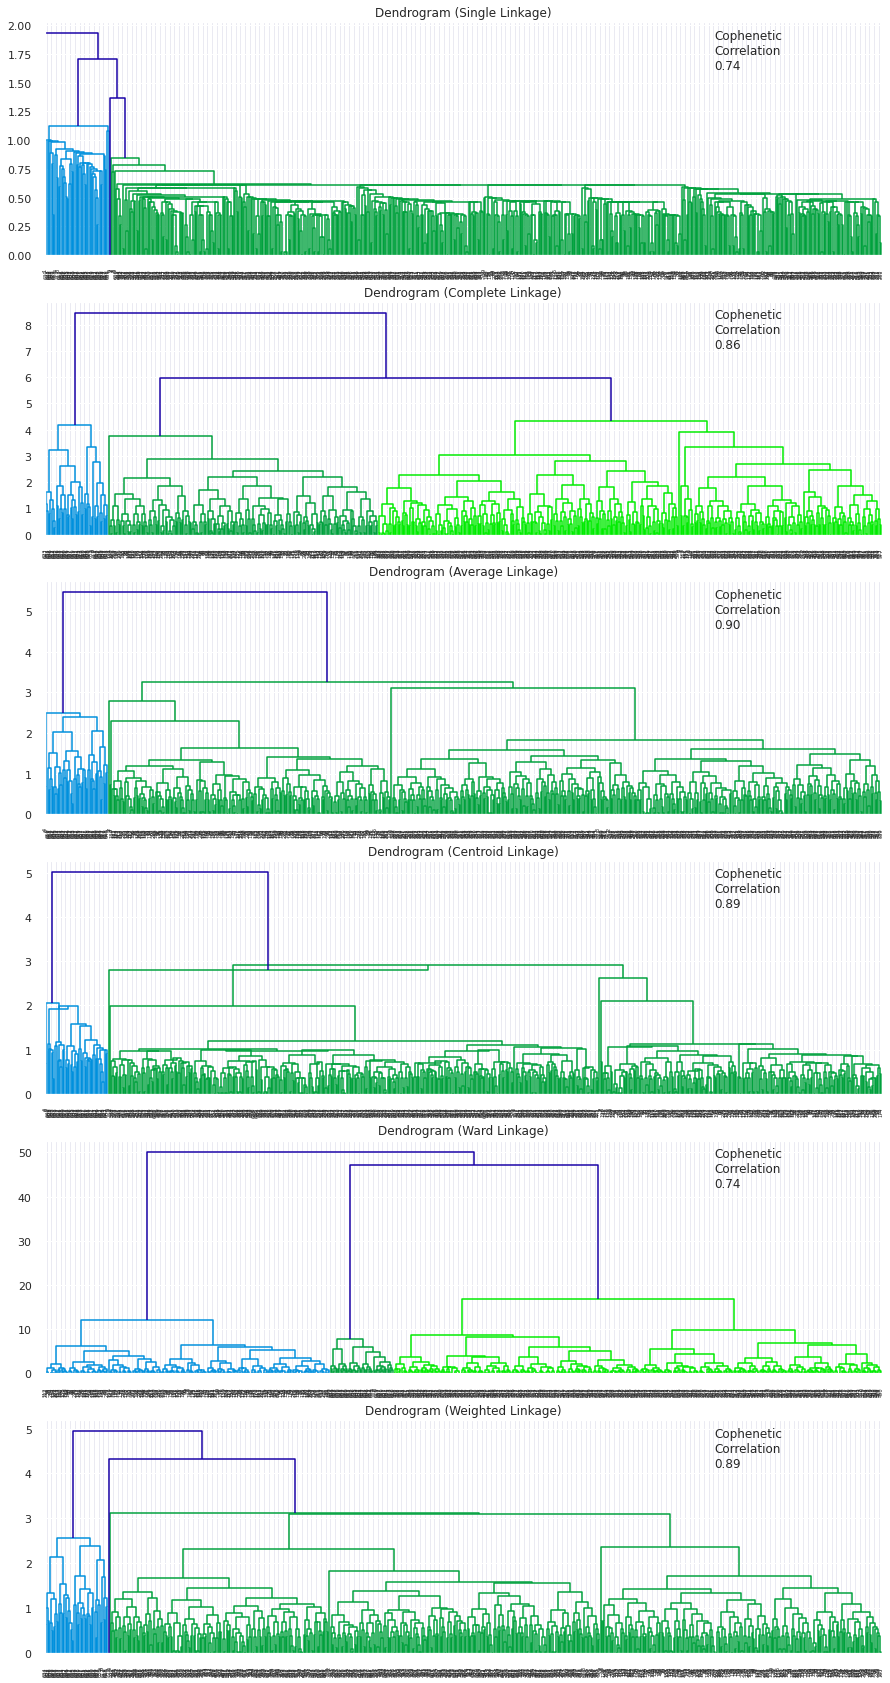

In [ ]:
# list of linkage methods
linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"]

# lists to save results of cophenetic correlation calculation
compare_cols = ["Linkage", "Cophenetic Coefficient"]

# to create a subplot image
fig, axs = plt.subplots(len(linkage_methods), 1, figsize=(15, 30))

# We will enumerate through the list of linkage methods above
# For each linkage method, we will plot the dendrogram and calculate the cophenetic correlation
for i, method in enumerate(linkage_methods):
    Z = linkage(data_scaled, metric="euclidean", method=method)

    dendrogram(Z, ax=axs[i])
    axs[i].set_title(f"Dendrogram ({method.capitalize()} Linkage)")

    coph_corr, coph_dist = cophenet(Z, pdist(data_scaled))
    axs[i].annotate(
        f"Cophenetic\nCorrelation\n{coph_corr:0.2f}",
        (0.80, 0.80),
        xycoords="axes fraction",
    )

Factors that we will consider before choosing a particular linkage method:
* High Cophenetic correlation
* Dendrogram with clear cluster formation
* Dendrogram with homogenous clusters

Based on the above factors:
* **Single method** has low Cophenetic correlation and poor clustering - 2 major clusters based on homogeneity of which one cluster clearly has more number of datapoints compared with the other. So this might not be useful for us for further study.
* **Complete method** has good Cophenetic correlation and good homogeneity. This might be useful.
* **Average method** has the best Cophenetic correlation and good homogeneity. This will be useful.
* **Centriod method** is similar to complete method but with better homogeneity.
* **ward method** has great homogeneity but poor Cophenetic correlation
* **weighted method** is similar to complete method.

If we were to visualize the results in a 3d plot - the complete method, average method and ward method will have datapoints clearly separated based on clusters, whereas for all other the datapoints might be overlapping between cluster to cluster.

Since Centroid is similar to average - we will further study Average, complete and Ward and decide the best method based on business interpretation.

In all 3 cases, 3 appears to be the apprioriate number of clusters


### **Average Method**

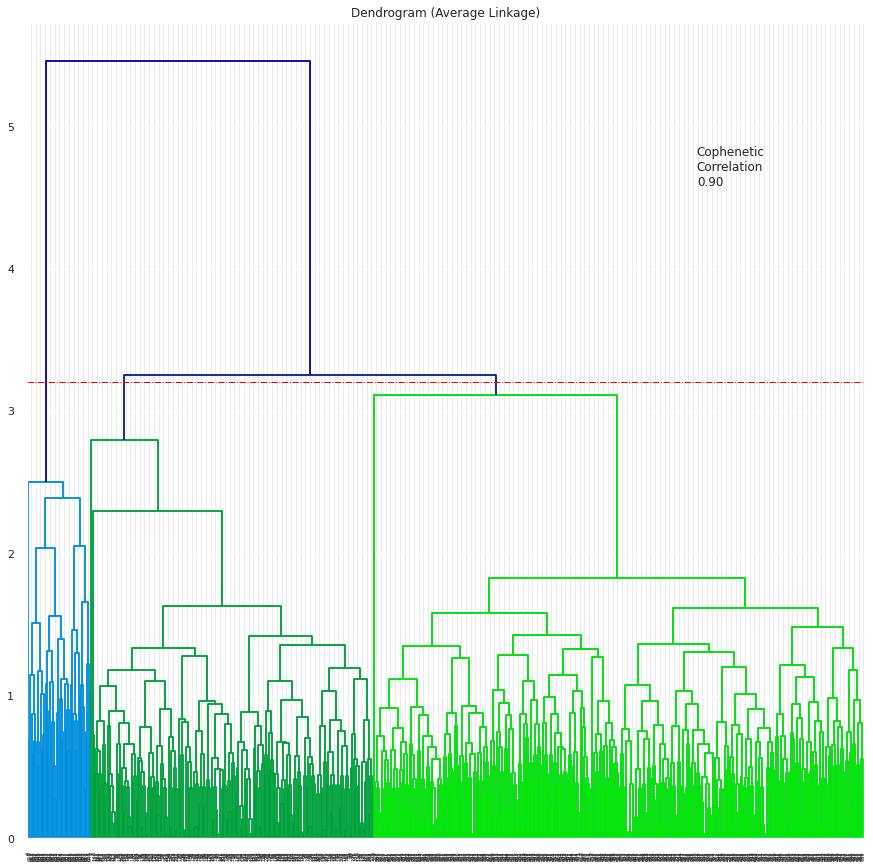

In [ ]:
# list of linkage methods
linkage_methods = ["average"]

# lists to save results of cophenetic correlation calculation
compare_cols = ["Linkage", "Cophenetic Coefficient"]

# to create a subplot image
fig, axs = plt.subplots(len(linkage_methods), 1, figsize=(15, 15))

# We will enumerate through the list of linkage methods above
# For each linkage method, we will plot the dendrogram and calculate the cophenetic correlation
for i, method in enumerate(linkage_methods):
    Z = linkage(data_scaled, metric="euclidean", method=method)

    dendrogram(Z, ax=axs)
    axs.set_title(f"Dendrogram ({method.capitalize()} Linkage)")

    coph_corr, coph_dist = cophenet(Z, pdist(data_scaled))
    axs.annotate(
        f"Cophenetic\nCorrelation\n{coph_corr:0.2f}",
        (0.80, 0.80),
        xycoords="axes fraction",
    )
dendrogram(Z, color_threshold=3.20)
plt.axhline(y=3.20, c="red", lw=1, linestyle="dashdot")

So, at around 3.20 we can have 3 clusters

**Hierarchical clustering**

In [ ]:
HCmodel_average = AgglomerativeClustering(n_clusters=3, affinity="euclidean", linkage="average")
HCmodel_average.fit(data_scaled)

AgglomerativeClustering(linkage='average', n_clusters=3)

In [ ]:
data1_average = data1.copy()

In [ ]:
data1_average["HC_Clusters"] = HCmodel_average.labels_
df["HC_Clusters"] = HCmodel_average.labels_

**Cluster Profiling**

In [ ]:
cluster_profile_average = data1_average.groupby("HC_Clusters").mean()

In [ ]:
cluster_profile_average["count_in_each_segments"] = (
    data1_average.groupby("HC_Clusters")["Total_Credit_Cards"].count().values
)

In [ ]:
# lets display cluster profile
cluster_profile_average.style.highlight_max(color="lightgreen", axis=0)

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,count_in_each_segments
HC_Clusters,,,,,,
0,33713.178295,5.511628,3.485788,0.984496,2.005168,387
1,141040.000000,8.740000,0.600000,10.900000,1.080000,50
2,12197.309417,2.403587,0.928251,3.560538,6.883408,223


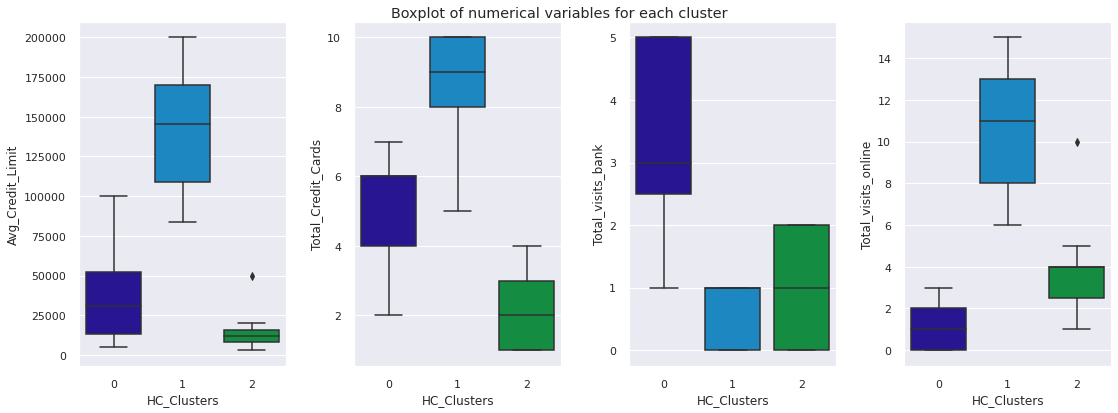

In [ ]:
fig, axes = plt.subplots(1, 4, figsize=(16, 6))
fig.suptitle("Boxplot of numerical variables for each cluster")
counter = 0
for ii in range(4):
    sns.boxplot(ax=axes[ii], y=data1_average[num_col[counter]], x=data1_average["HC_Clusters"])
    counter = counter + 1

fig.tight_layout(pad=2.0)

### Complete Method

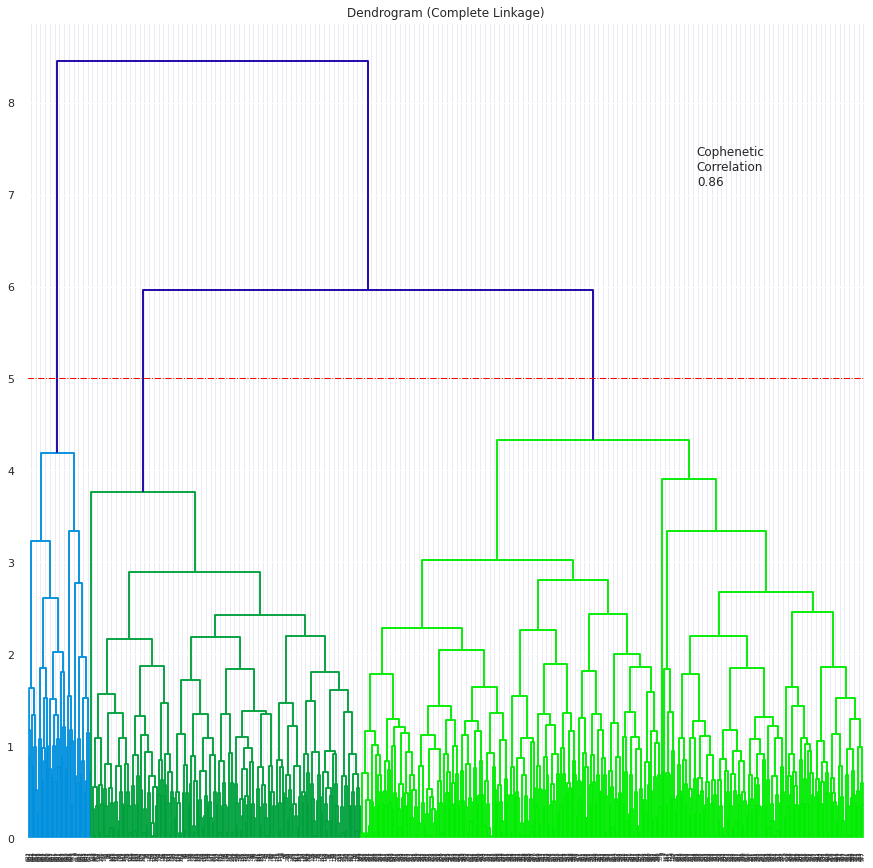

In [ ]:
# list of linkage methods
linkage_methods = ["complete"]

# lists to save results of cophenetic correlation calculation
compare_cols = ["Linkage", "Cophenetic Coefficient"]

# to create a subplot image
fig, axs = plt.subplots(len(linkage_methods), 1, figsize=(15, 15))

# We will enumerate through the list of linkage methods above
# For each linkage method, we will plot the dendrogram and calculate the cophenetic correlation
for i, method in enumerate(linkage_methods):
    Z = linkage(data_scaled, metric="euclidean", method=method)

    dendrogram(Z, ax=axs)
    axs.set_title(f"Dendrogram ({method.capitalize()} Linkage)")

    coph_corr, coph_dist = cophenet(Z, pdist(data_scaled))
    axs.annotate(
        f"Cophenetic\nCorrelation\n{coph_corr:0.2f}",
        (0.80, 0.80),
        xycoords="axes fraction",
    )
dendrogram(Z, color_threshold=5)
plt.axhline(y=5, c="red", lw=1, linestyle="dashdot")

So at around 5, we can have 3 clusters

**Hierarchical Clustering**

In [ ]:
HCmodel_complete = AgglomerativeClustering(n_clusters=3, affinity="euclidean", linkage="complete")
HCmodel_complete.fit(data_scaled)

AgglomerativeClustering(linkage='complete', n_clusters=3)

In [ ]:
data1_complete = data1.copy()

In [ ]:
data1_complete["HC_Clusters"] = HCmodel_complete.labels_

**Cluster Profiling**

In [ ]:
cluster_profile_complete = data1_complete.groupby("HC_Clusters").mean()

In [ ]:
cluster_profile_complete["count_in_each_segments"] = (
    data1_complete.groupby("HC_Clusters")["Total_Credit_Cards"].count().values
)

In [ ]:
# lets display cluster profile
cluster_profile_complete.style.highlight_max(color="lightgreen", axis=0)


,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,count_in_each_segments
HC_Clusters,,,,,,
0,33151.133501,5.460957,3.405542,1.010076,2.060453,397
1,141040.000000,8.740000,0.600000,10.900000,1.080000,50
2,12234.741784,2.352113,0.957746,3.633803,7.009390,213


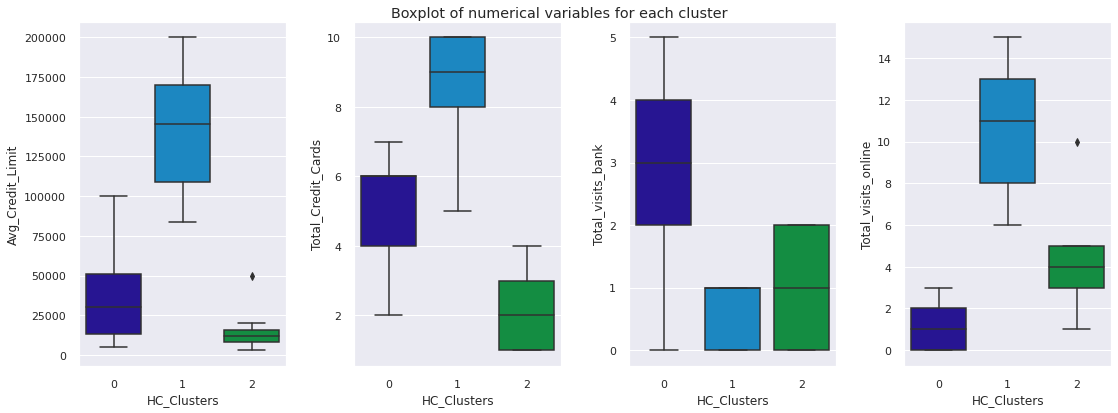

In [ ]:
fig, axes = plt.subplots(1, 4, figsize=(16, 6))
fig.suptitle("Boxplot of numerical variables for each cluster")
counter = 0
for ii in range(4):
    sns.boxplot(ax=axes[ii], y=data1_complete[num_col[counter]], x=data1_complete["HC_Clusters"])
    counter = counter + 1

fig.tight_layout(pad=2.0)

### Ward Method

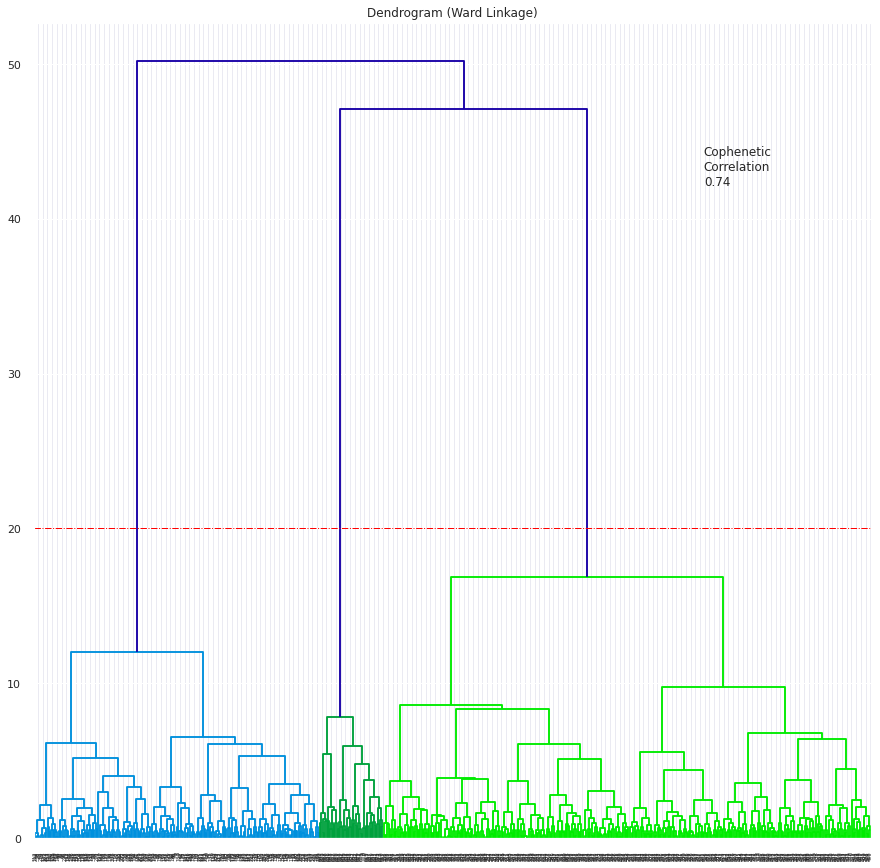

In [ ]:
# list of linkage methods
linkage_methods = ["ward"]

# lists to save results of cophenetic correlation calculation
compare_cols = ["Linkage", "Cophenetic Coefficient"]

# to create a subplot image
fig, axs = plt.subplots(len(linkage_methods), 1, figsize=(15, 15))

# We will enumerate through the list of linkage methods above
# For each linkage method, we will plot the dendrogram and calculate the cophenetic correlation
for i, method in enumerate(linkage_methods):
    Z = linkage(data_scaled, metric="euclidean", method=method)

    dendrogram(Z, ax=axs)
    axs.set_title(f"Dendrogram ({method.capitalize()} Linkage)")

    coph_corr, coph_dist = cophenet(Z, pdist(data_scaled))
    axs.annotate(
        f"Cophenetic\nCorrelation\n{coph_corr:0.2f}",
        (0.80, 0.80),
        xycoords="axes fraction",
    )
dendrogram(Z, color_threshold=20)
plt.axhline(y=20, c="red", lw=1, linestyle="dashdot")

So at around 20, we can have 3 clusters

**Hierarchical clustering**

In [ ]:
HCmodel_ward = AgglomerativeClustering(n_clusters=3, affinity="euclidean", linkage="ward")
HCmodel_ward.fit(data_scaled)

AgglomerativeClustering(n_clusters=3)

In [ ]:
data1_ward = data1.copy()

In [ ]:
data1_ward["HC_Clusters"] = HCmodel_ward.labels_

**Cluster Profiling**

In [ ]:
cluster_profile_ward = data1_ward.groupby("HC_Clusters").mean()

In [ ]:
cluster_profile_ward["count_in_each_segments"] = (
    data1_ward.groupby("HC_Clusters")["Total_Credit_Cards"].count().values
)

In [ ]:
# lets display cluster profile
cluster_profile_ward.style.highlight_max(color="lightgreen", axis=0)

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,count_in_each_segments
HC_Clusters,,,,,,
0,33851.948052,5.516883,3.493506,0.979221,1.994805,385
1,12151.111111,2.422222,0.937778,3.546667,6.857778,225
2,141040.000000,8.740000,0.600000,10.900000,1.080000,50


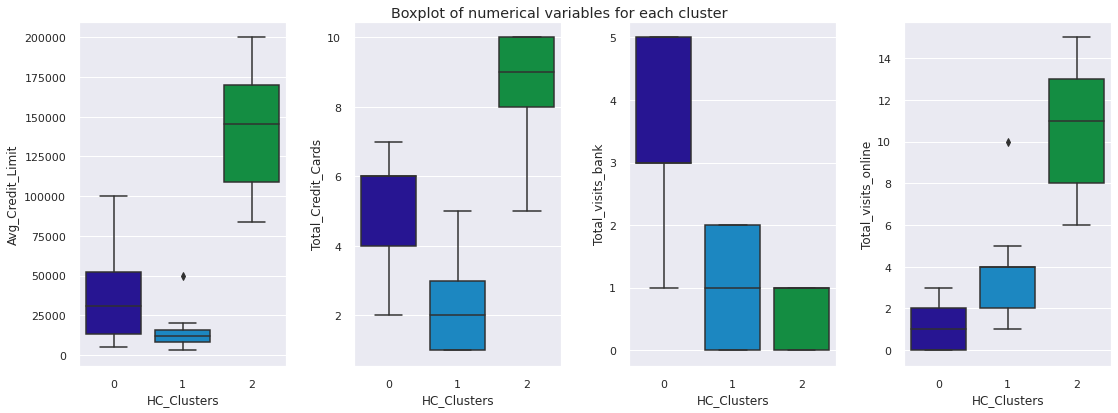

In [ ]:
fig, axes = plt.subplots(1, 4, figsize=(16, 6))
fig.suptitle("Boxplot of numerical variables for each cluster")
counter = 0
for ii in range(4):
    sns.boxplot(ax=axes[ii], y=data1_ward[num_col[counter]], x=data1_ward["HC_Clusters"])
    counter = counter + 1

fig.tight_layout(pad=2.0)

Lets put all cluster profiling together

K-Means clustering:

In [ ]:
cluster_profile.style.highlight_max(color="lightgreen", axis=0)

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,count_in_each_segment
K_means_segments,,,,,,
0,33782.383420,5.515544,3.489637,0.981865,2.000000,386
1,12174.107143,2.410714,0.933036,3.553571,6.870536,224
2,141040.000000,8.740000,0.600000,10.900000,1.080000,50


Hierarchical with Euclidean distance and Average Method:

In [ ]:
cluster_profile_average.style.highlight_max(color="lightgreen", axis=0)

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,count_in_each_segments
HC_Clusters,,,,,,
0,33713.178295,5.511628,3.485788,0.984496,2.005168,387
1,141040.000000,8.740000,0.600000,10.900000,1.080000,50
2,12197.309417,2.403587,0.928251,3.560538,6.883408,223


Hierarchical with Euclidean distance and Complete method

In [ ]:
cluster_profile_complete.style.highlight_max(color="lightgreen", axis=0)

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,count_in_each_segments
HC_Clusters,,,,,,
0,33151.133501,5.460957,3.405542,1.010076,2.060453,397
1,141040.000000,8.740000,0.600000,10.900000,1.080000,50
2,12234.741784,2.352113,0.957746,3.633803,7.009390,213


Hierarchical with Euclidean distance and Ward method

In [ ]:
cluster_profile_ward.style.highlight_max(color="lightgreen", axis=0)

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,count_in_each_segments
HC_Clusters,,,,,,
0,33851.948052,5.516883,3.493506,0.979221,1.994805,385
1,12151.111111,2.422222,0.937778,3.546667,6.857778,225
2,141040.000000,8.740000,0.600000,10.900000,1.080000,50


## Conclusions

**Best method in Heirarchical clustering**:
* From the above cluster profiling values, we can clearly see that the Average method and ward method matched closely with the values in K-means clustering.
* The complete method was off by 10 datapoints difference but the average values in each column are still close between all the above methods though.
* When comparing between ward and average -> average method has higher cophenetic correlation.
* So considering all these cases, **the average method with Euclidean distance can be concluded as the best method for the Hierarchical clustering with our dataset.**

**K-Means vs Hierarchical**

So, the best method in Hierarchical - average method and the K-means were to compared for the best approach, we can select **K-Means** for the follwing reasons:
* Takes less computational time
* Silhouette coefficient can be used to measure the accuracy of cluster formation whereas with hierarchical clustering we do not have one.

**Now let us see the duplicated customer values with cluster numbers formed with K-means and Average method in Hierarchical:**

In [ ]:
df.sample(10)

,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,K_means_segments,HC_Clusters
Sl_No,,,,,,,,
173,28842,20000,2,0,5,6,1,2
336,64672,19000,6,5,2,0,0,0
475,29919,38000,4,3,1,4,0,0
243,35549,8000,4,3,2,4,0,0
441,48667,50000,5,3,0,3,0,0
650,30570,112000,10,1,8,1,2,1
113,87291,18000,4,1,3,10,1,2
438,87219,54000,6,3,0,2,0,0
622,84192,166000,9,1,12,2,2,1


In [ ]:
duplicated_indexes = df['Customer Key'].duplicated()

In [ ]:
duplicated_values = []
for i in range(0,len(df)):
  if duplicated_indexes.iloc[i] == True:
    duplicated_values.append(df.iloc[i])

In [ ]:
duplicated_values = pd.DataFrame(duplicated_values)

In [ ]:
cust_key = duplicated_values['Customer Key']

In [ ]:
all_duplicated_values = []
for i in cust_key:
  for j in range(0,len(df)):
    if df['Customer Key'].iloc[j] == i:
      all_duplicated_values.append(df.iloc[j])

all_duplicated_values = pd.DataFrame(all_duplicated_values)

In [ ]:
all_duplicated_values

,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,K_means_segments,HC_Clusters
5,47437,100000,6,0,12,3,2,1
333,47437,17000,7,3,1,0,0,0
392,96929,13000,4,5,0,0,0,0
399,96929,67000,6,2,2,2,0,0
49,37252,6000,4,0,2,8,1,2
433,37252,59000,6,2,1,2,0,0
412,50706,44000,4,5,0,2,0,0
542,50706,60000,7,5,2,2,0,0
105,97935,17000,2,1,2,10,1,2
633,97935,187000,7,1,7,0,2,1


For 2 of the 5 cases, the cluster has remained the same for both the entries in both both methods, but we could still see that the other column values have changed. So, we cannot treat these as duplicated values and hence need not be treated for duplicate values. From the column Total_Credit_Cards and Avg_Credit_Limit, we can see that for almost all cases there is an upward trend, so updates instead of duplicate values may be we can treat those as updated values.

## Business Recommendations

As discussed earlier, we can split the dataset into 3 clusters and concentrate more on the customers depending on the cluster they fall into:

* **Cluster 0** can be said as the cluster with **Customers who prefer visiting in-person**
* **Cluster 1** can be said as the cluster with **Customers who prefer making calls**
* **Cluster 2** can be said as the cluster with **Customers who prefer visiting online**

To improve service systems or to penetrate more into the market,

**Cluster 0:**
Improve the in-person services for these customers. Since, these customers visit the bank often, any offers or ads can be prepared in the office such a way to target this customer base. These are the Customers whose “Total_Credit_Cards” fall around 3 to 7 and has the “Avg_Credit_Limit” ranging around 20000 to 100000 prefer to visit the bank in-person. So, depending upon these credit limit and number of credit card, the offers can be filtered to these people.

**Cluster 1:**
Improve the call services for these customers and since these customers prefer calling any advertisements on the phone calls can be focused primarily for this group of customers whose credit limit is upto 20000 and has the credit cards upto 3. These are the customers whose “Total_Credit_Cards” fall around 1 to 3 and has the “Avg_Credit_Limit” ranging from 0 to 20000 prefer to make calls. These people have the lowest credit limits and low number of credit cards. If we were to have wage information for the customers and if these customers were making good money, then the call services shoudl be improved and more offers should be targeted for these people as these are the customers with lowest credit limit and less credit cards. Also, since these people are active through calls, more calls can be made to these customers.

**Cluster 2:**
The customer with more than 7 credit cards and having more than 100000 as credit limit fall into this category and these customers prefer vising the website. Probably, these are the wealthier customers compared to other customers. So, any high budget plans/schemes can be targeted for these customers. Also since these peopel are actively online, online ads can be tailored to fit this particular group of customers.


